<a href="https://colab.research.google.com/github/chakravartulavinay/CAPSTONE_CLASSIFIER_PROJECT_UNP/blob/main/Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [154]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [155]:
URL = "/content/drive/MyDrive/german_credit.csv"
data = pd.read_csv(URL)
df = pd.read_csv(URL)
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,3-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,3-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,3-Feb,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [156]:
data.shape

(1000, 21)

In [157]:
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [158]:
data = data.drop(columns = ['status','duration','purpose','amount','telephone','number_credits'])
data.columns

Index(['credit_history', 'savings', 'employment_duration', 'installment_rate',
       'personal_status_sex', 'other_debtors', 'present_residence', 'property',
       'age', 'other_installment_plans', 'housing', 'job', 'people_liable',
       'foreign_worker', 'credit_risk'],
      dtype='object')

In [159]:
data.shape

(1000, 15)

In [160]:
data["credit_risk"].value_counts()

good    700
bad     300
Name: credit_risk, dtype: int64

In [161]:
data.duplicated().value_counts()

False    991
True       9
dtype: int64

In [162]:
data = data.drop_duplicates()
data

,credit_history,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,job,people_liable,foreign_worker,credit_risk
0,all credits at this bank paid back duly,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,21,none,for free,skilled employee/official,0 to 2,no,good
1,all credits at this bank paid back duly,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,36,none,for free,skilled employee/official,3 or more,no,good
2,no credits taken/all credits paid back duly,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,23,none,for free,unskilled - resident,0 to 2,no,good
3,all credits at this bank paid back duly,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,39,none,for free,unskilled - resident,3 or more,yes,good
4,all credits at this bank paid back duly,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,38,bank,rent,unskilled - resident,0 to 2,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no credits taken/all credits paid back duly,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,>= 7 yrs,unknown / no property,21,none,for free,unskilled - resident,3 or more,no,bad
996,no credits taken/all credits paid back duly,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,< 1 yr,unknown / no property,45,none,rent,skilled employee/official,0 to 2,no,bad
997,all credits at this bank paid back duly,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,>= 7 yrs,real estate,30,none,own,manager/self-empl./highly qualif. employee,0 to 2,no,bad
998,no credits taken/all credits paid back duly,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,< 1 yr,real estate,52,none,rent,manager/self-empl./highly qualif. employee,0 to 2,no,bad


In [163]:
data.columns

Index(['credit_history', 'savings', 'employment_duration', 'installment_rate',
       'personal_status_sex', 'other_debtors', 'present_residence', 'property',
       'age', 'other_installment_plans', 'housing', 'job', 'people_liable',
       'foreign_worker', 'credit_risk'],
      dtype='object')

In [164]:
data.shape

(991, 15)

In [165]:
data.isna().sum()

credit_history             0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
job                        0
people_liable              0
foreign_worker             0
credit_risk                0
dtype: int64

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   credit_history           991 non-null    object
 1   savings                  991 non-null    object
 2   employment_duration      991 non-null    object
 3   installment_rate         991 non-null    object
 4   personal_status_sex      991 non-null    object
 5   other_debtors            991 non-null    object
 6   present_residence        991 non-null    object
 7   property                 991 non-null    object
 8   age                      991 non-null    int64 
 9   other_installment_plans  991 non-null    object
 10  housing                  991 non-null    object
 11  job                      991 non-null    object
 12  people_liable            991 non-null    object
 13  foreign_worker           991 non-null    object
 14  credit_risk              991 non-null    o

In [167]:
data["credit_history"].value_counts()
data["savings"].value_counts()
(data["employment_duration"].value_counts())
data["installment_rate"].value_counts()
data["personal_status_sex"].value_counts()
data["other_debtors"].value_counts()
data["present_residence"].value_counts()
data["property"].value_counts()
data["other_installment_plans"].value_counts()
data["housing"].value_counts()
data["job"].value_counts()
data["people_liable"].value_counts()
data["foreign_worker"].value_counts()
data["credit_risk"].value_counts()

good    693
bad     298
Name: credit_risk, dtype: int64

In [168]:
# data["credit_history"]=data.credit_history.astype('int')
data["credit_history"] = data.credit_history.replace(("no credits taken/all credits paid back duly",
                                                      "all credits at this bank paid back duly",
                                                      "existing credits paid back duly till now",
                                                      "critical account/other credits elsewhere",
                                                      "delay in paying off in the past"),(1,1,1,0,0))
data["savings"] = data.savings.replace(("... >= 1000 DM","500 <= ... < 1000 DM","100 <= ... <  500 DM",
                                        "... <  100 DM","unknown/no savings account"),(1,1,1,0,0))
data["employment_duration"] = data.employment_duration.replace(("1 <= ... < 4 yrs",">= 7 yrs",
                                                              "4 <= ... < 7 yrs","< 1 yr","unemployed"),(1,1,1,0,0))
data["installment_rate"] = data.installment_rate.replace(("25 <= ... < 35",">= 35","< 20","20 <= ... < 25"),(1,1,0,0))
data["personal_status_sex"] = data.personal_status_sex.replace(("male : married/widowed","male : divorced/separated",
                                                               "female : non-single or male : single","female : single"),(1,1,0,0))
data["other_debtors"] = data.other_debtors.replace(("none","guarantor","co-applicant"),(1,0,0))
data["present_residence"] = data.present_residence.replace(("1 <= ... < 4 yrs","4 <= ... < 7 yrs",
                                                           ">= 7 yrs","< 1 yr"),(1,1,1,0))
data["property"] = data.property.replace(("building soc. savings agr./life insurance","real estate",
                                          "car or other","unknown / no property"),(1,1,1,0))
data["other_installment_plans"] = data.other_installment_plans.replace(("none","bank","stores"),(1,0,0))
data["housing"] = data.housing.replace(("rent","for free","own"),(1,0,0))
data["job"] = data.job.replace(("skilled employee/official","manager/self-empl./highly qualif. employee",
                                           "unskilled - resident","unemployed/unskilled - non-resident"),(1,1,0,0))
data["people_liable"] = data.people_liable.replace(("0 to 2","3 or more"),(1,0))
data["foreign_worker"] = data.foreign_worker.replace(("no","yes"),(1,0))
data["credit_risk"] = data.credit_risk.replace(("good","bad"),(1,0))
## replacing good with low, bad with high
df["credit_risk"] = df.credit_risk.replace(("good","bad"),("low","high"))

In [169]:
data

,credit_history,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,job,people_liable,foreign_worker,credit_risk
0,1,0,0,0,0,1,1,1,21,1,0,1,1,1,1
1,1,0,1,1,1,1,1,0,36,1,0,1,0,1,1
2,1,0,1,1,0,1,1,0,23,1,0,0,1,1,1
3,1,0,1,0,1,1,1,0,39,1,0,0,0,0,1
4,1,0,1,0,1,1,1,1,38,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,1,1,1,1,0,21,1,0,0,0,1,0
996,1,0,1,0,1,0,0,0,45,1,1,1,1,1,0
997,1,1,1,0,1,1,1,1,30,1,0,1,1,1,0
998,1,1,0,1,1,1,0,1,52,1,1,1,1,1,0


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   credit_history           991 non-null    int64
 1   savings                  991 non-null    int64
 2   employment_duration      991 non-null    int64
 3   installment_rate         991 non-null    int64
 4   personal_status_sex      991 non-null    int64
 5   other_debtors            991 non-null    int64
 6   present_residence        991 non-null    int64
 7   property                 991 non-null    int64
 8   age                      991 non-null    int64
 9   other_installment_plans  991 non-null    int64
 10  housing                  991 non-null    int64
 11  job                      991 non-null    int64
 12  people_liable            991 non-null    int64
 13  foreign_worker           991 non-null    int64
 14  credit_risk              991 non-null    int64
dtypes: int

In [171]:
data.describe()

,credit_history,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,job,people_liable,foreign_worker,credit_risk
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,0.911201,0.293643,0.764884,0.367306,0.595358,0.906155,0.870838,0.720484,35.529768,0.815338,0.712412,0.779011,0.848638,0.962664,0.699294
std,0.284597,0.455660,0.424285,0.482314,0.491070,0.291760,0.335549,0.448988,11.382375,0.388219,0.452867,0.415123,0.358583,0.189680,0.458797
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# EDA - Exploratory Data Analysis

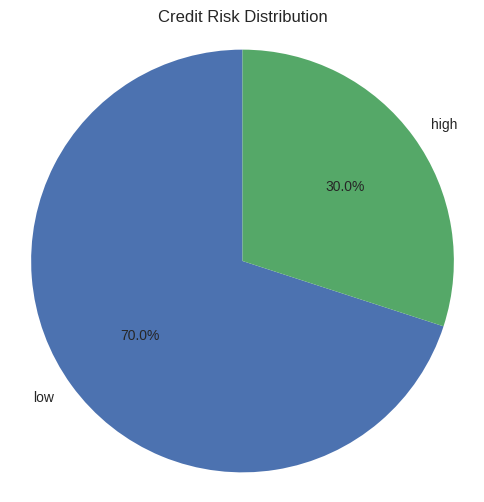

In [172]:
credit_risk_counts = df['credit_risk'].value_counts()
labels = credit_risk_counts.index
sizes = credit_risk_counts.values
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Credit Risk Distribution')
plt.axis('equal')
plt.show()

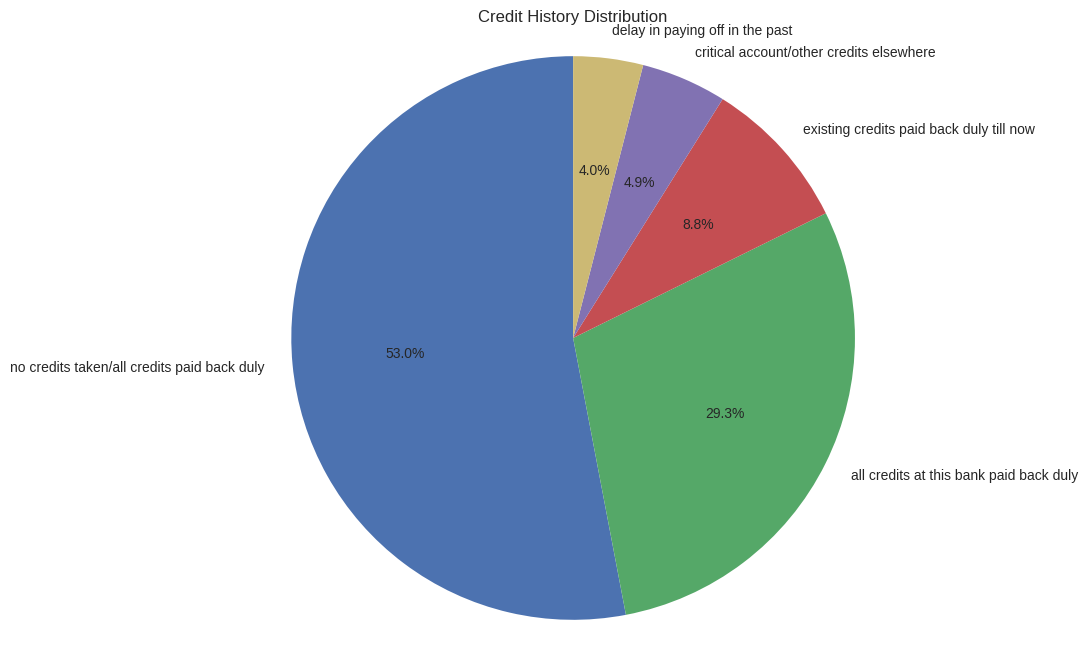

In [173]:
credit_history_counts = df['credit_history'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(credit_history_counts, labels=credit_history_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Credit History Distribution')
plt.axis('equal')
plt.show()

<ipython-input-174-923061145eb6>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


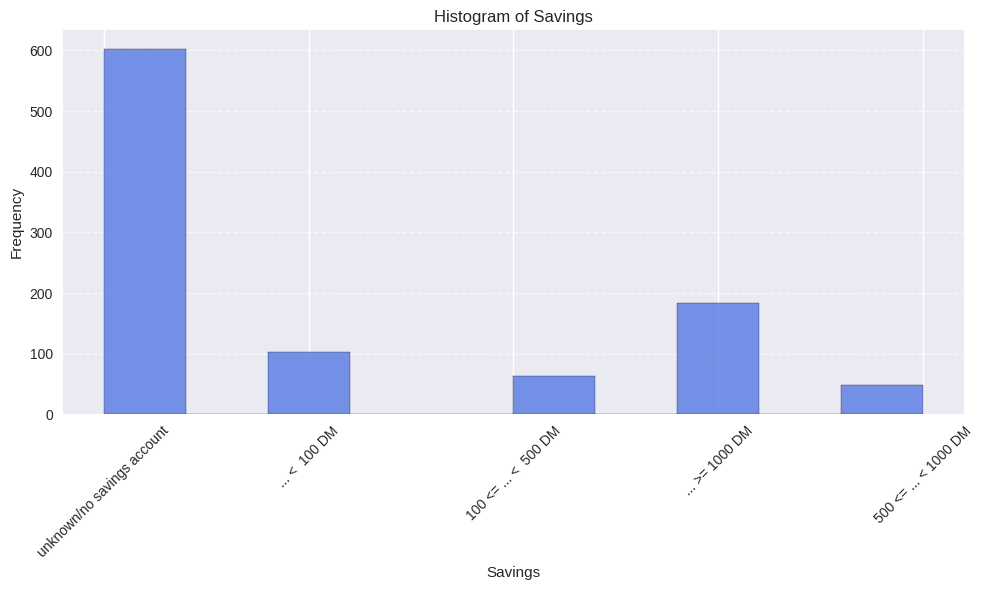

In [174]:
savings_data = df['savings']
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')
plt.hist(savings_data, bins=10, edgecolor='k', alpha=0.7, color='royalblue')
plt.xlabel('Savings')
plt.ylabel('Frequency')
plt.title('Histogram of Savings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

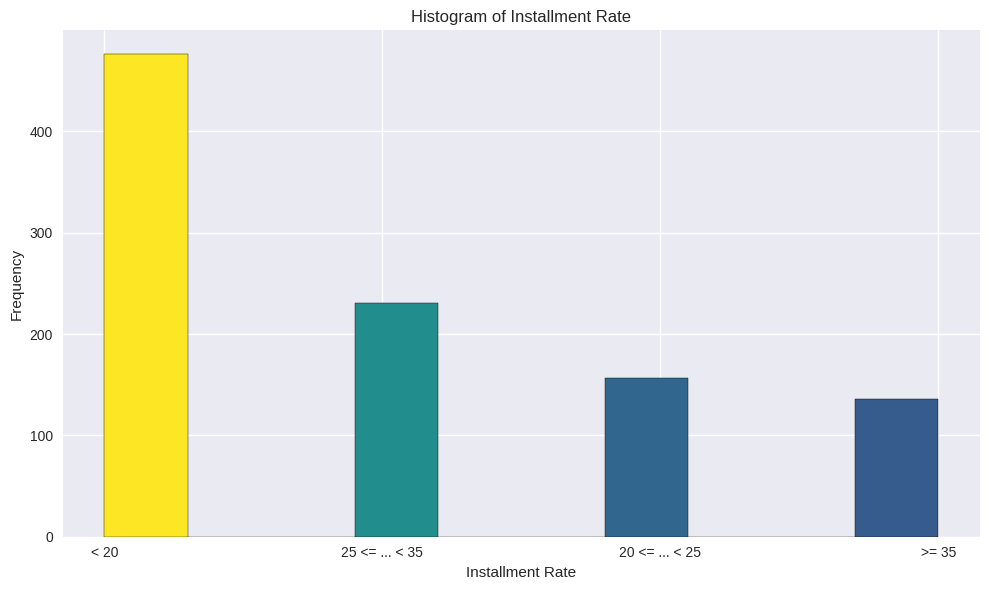

In [175]:
installment_rate_data = df['installment_rate']
num_bins = 10
cmap = plt.get_cmap('viridis')
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(installment_rate_data, bins=num_bins, edgecolor='k')
bin_colors = n / n.max()
for i, patch in enumerate(patches):
    color = cmap(bin_colors[i])
    patch.set_facecolor(color)
plt.xlabel('Installment Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Installment Rate')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

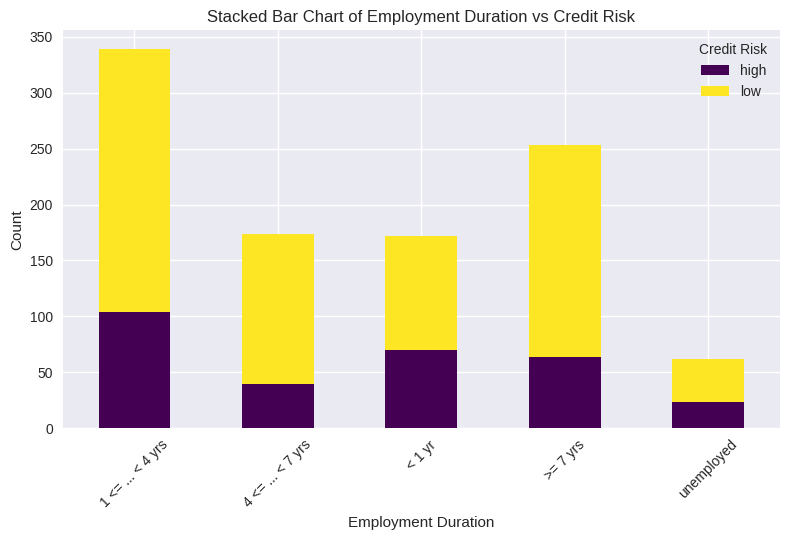

In [176]:
grouped_data = df.groupby(['employment_duration', 'credit_risk']).size().unstack().fillna(0)
plt.figure(figsize=(10, 6))
ax = grouped_data.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Employment Duration')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Employment Duration vs Credit Risk')
plt.legend(title='Credit Risk')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

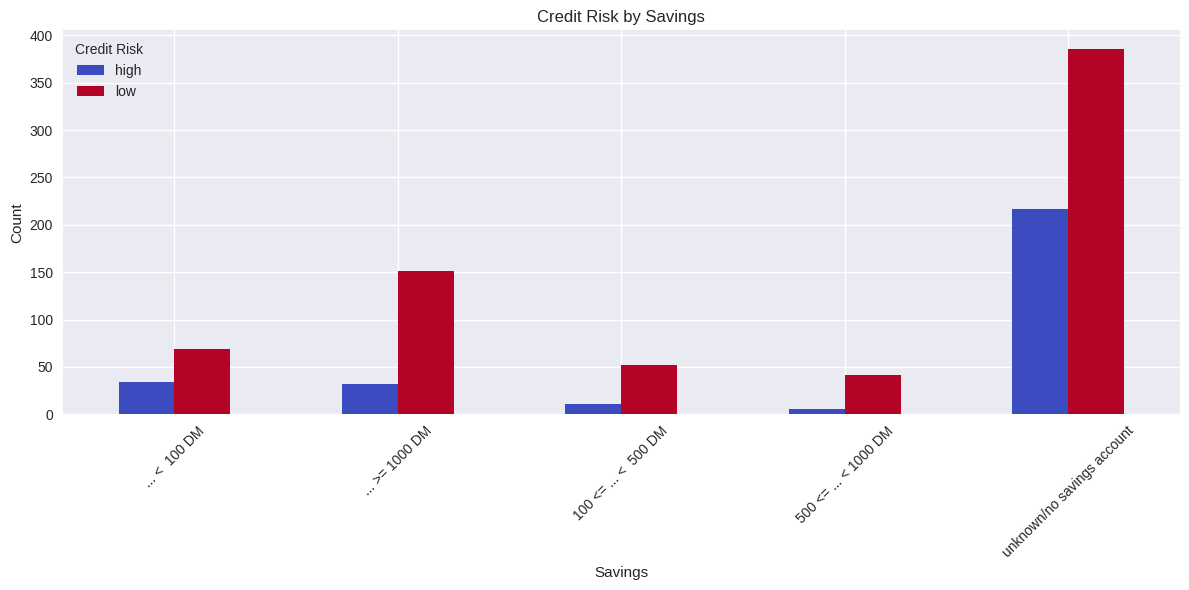

In [177]:
cross_tab = pd.crosstab(df['savings'], df['credit_risk'])
cross_tab.plot(kind='bar', colormap='coolwarm', figsize=(12, 6))
plt.xlabel('Savings')
plt.ylabel('Count')
plt.title('Credit Risk by Savings')
plt.legend(title='Credit Risk')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

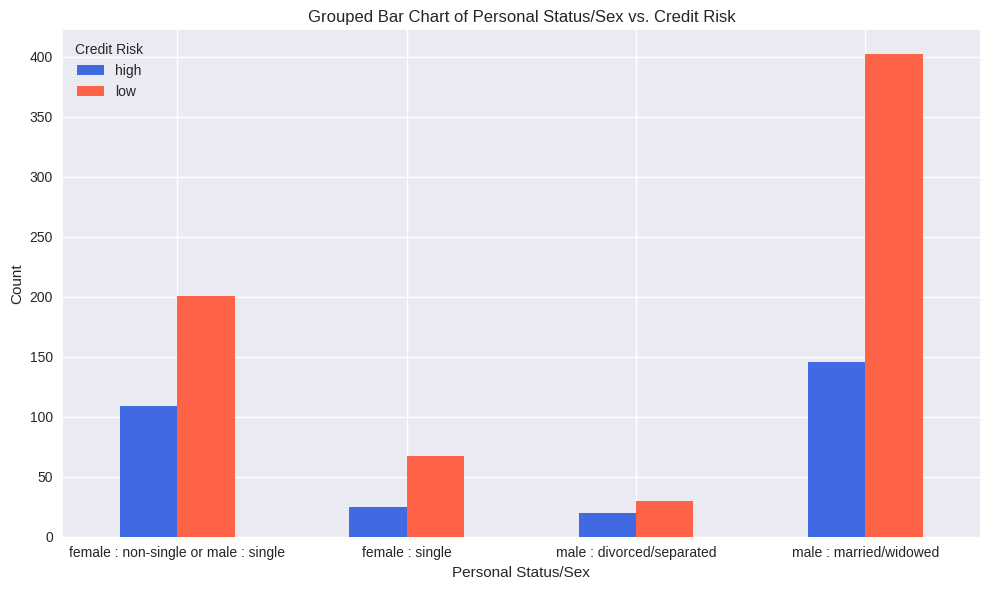

In [178]:
cross_tab = pd.crosstab(df['personal_status_sex'], df['credit_risk'])
colors = ['royalblue', 'tomato']
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', color=colors, figsize=(10, 6))
plt.xlabel('Personal Status/Sex')
plt.ylabel('Count')
plt.title('Grouped Bar Chart of Personal Status/Sex vs. Credit Risk')
plt.xticks(rotation=0)
plt.legend(title='Credit Risk')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

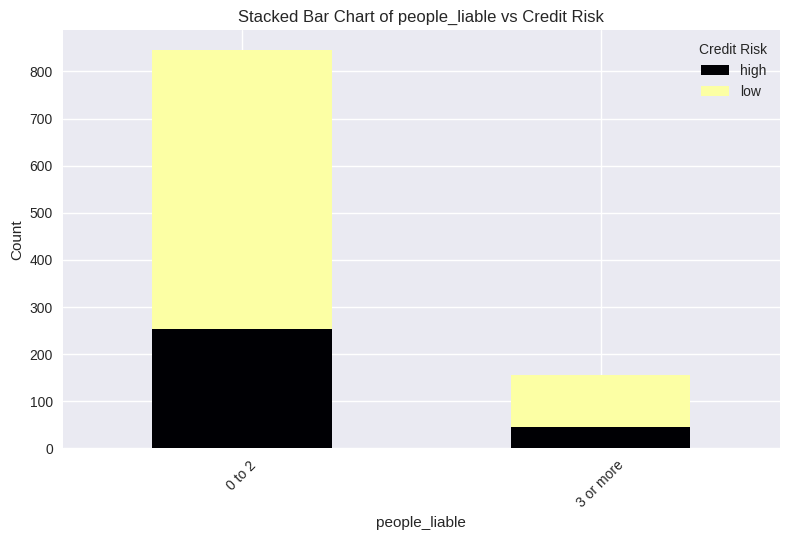

In [179]:
grouped_data = df.groupby(['people_liable','credit_risk']).size().unstack().fillna(0)
plt.figure(figsize=(10, 6))
ax = grouped_data.plot(kind='bar', stacked=True, colormap='inferno')
plt.xlabel('people_liable')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of people_liable vs Credit Risk')
plt.legend(title='Credit Risk')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Logistic Regression

In [180]:
x = data.drop("credit_risk",axis = 1)
y = data['credit_risk']

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 7)

In [182]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(693, 14)
(298, 14)
(693,)
(298,)


In [183]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [184]:
predictions = classifier.predict(x_test)

In [185]:
classification_rep = classification_report(y_test,predictions)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.74      0.18      0.29        93
           1       0.72      0.97      0.83       205

    accuracy                           0.72       298
   macro avg       0.73      0.58      0.56       298
weighted avg       0.73      0.72      0.66       298



In [186]:
conf_matrix = confusion_matrix(y_test,predictions)
print(conf_matrix)

[[ 17  76]
 [  6 199]]


In [187]:
accuracy = format(accuracy_score(y_test,predictions),".3f") ## best fit
print(accuracy)

0.725


In [188]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.2,random_state =56)

In [189]:
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(792, 14)
(199, 14)
(792,)
(199,)


In [190]:
classifier = LogisticRegression()
classifier.fit(x_train1,y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [191]:
predictions1 = classifier.predict(x_test1)

In [192]:
classification_rep = classification_report(y_test1,predictions1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.78      0.26      0.39        70
           1       0.70      0.96      0.81       129

    accuracy                           0.71       199
   macro avg       0.74      0.61      0.60       199
weighted avg       0.73      0.71      0.66       199



In [193]:
conf_matrix = confusion_matrix(y_test1,predictions1)
print(conf_matrix)

[[ 18  52]
 [  5 124]]


In [194]:
accuracy = format(accuracy_score(y_test1,predictions1),".3f")
print(accuracy)

0.714


In [195]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y,test_size=0.25,random_state =56)

In [196]:
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(743, 14)
(248, 14)
(743,)
(248,)


In [197]:
classifier = LogisticRegression()
classifier.fit(x_train2,y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [198]:
predictions2 = classifier.predict(x_test2)

In [199]:
classification_rep = classification_report(y_test2,predictions2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.64      0.29      0.40        79
           1       0.74      0.92      0.82       169

    accuracy                           0.72       248
   macro avg       0.69      0.61      0.61       248
weighted avg       0.70      0.72      0.69       248



In [200]:
conf_matrix = confusion_matrix(y_test2,predictions2)
print(conf_matrix)

[[ 23  56]
 [ 13 156]]


In [201]:
accuracy = format(accuracy_score(y_test2,predictions2),".3f")
print(accuracy)

0.722


In [202]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x,y,test_size=0.4,random_state =156)

In [203]:
print(x_train3.shape)
print(x_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(594, 14)
(397, 14)
(594,)
(397,)


In [204]:
classifier = LogisticRegression()
classifier.fit(x_train3,y_train3)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [205]:
predictions3 = classifier.predict(x_test3)

In [206]:
classification_rep = classification_report(y_test3,predictions3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.57      0.23      0.33       123
           1       0.73      0.92      0.81       274

    accuracy                           0.71       397
   macro avg       0.65      0.58      0.57       397
weighted avg       0.68      0.71      0.66       397



In [207]:
conf_matrix = confusion_matrix(y_test3,predictions3)
print(conf_matrix)

[[ 28  95]
 [ 21 253]]


In [208]:
accuracy = format(accuracy_score(y_test3,predictions3),".3f")
print(accuracy)

0.708


# decision tree classifier

In [209]:
classify = DecisionTreeClassifier(criterion = "entropy", max_depth = 7, min_samples_split = 9, random_state = 10)                   ## in place of entropy we can use gini aswell.

In [210]:
classify.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=9,
                       random_state=10)

In [211]:
classify.feature_importances_ ## gives importance of each feature i.e columns

array([0.10149594, 0.10978551, 0.01461982, 0.05625223, 0.04603518,
       0.01865266, 0.05964804, 0.03531843, 0.33924826, 0.06415703,
       0.0500162 , 0.04301994, 0.03166032, 0.03009043])

In [212]:
y_predict = classify.predict(x_test)

In [213]:
classification_rep = classification_report(y_test,y_predict)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.47      0.20      0.29        93
           1       0.71      0.90      0.79       205

    accuracy                           0.68       298
   macro avg       0.59      0.55      0.54       298
weighted avg       0.64      0.68      0.64       298



In [214]:
conf_matrix = confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[ 19  74]
 [ 21 184]]


In [215]:
accuracy = format(accuracy_score(y_test,y_predict),".3f")
print(accuracy)

0.681


In [216]:
cross_val_score(classify, x_train, y_train, cv = 10)

array([0.67142857, 0.67142857, 0.62857143, 0.63768116, 0.62318841,
       0.75362319, 0.73913043, 0.68115942, 0.63768116, 0.69565217])

In [217]:
classify.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=9,
                       random_state=10)

In [218]:
classify.feature_importances_ ## gives importance of each feature i.e columns

array([0.12301824, 0.06972241, 0.05305194, 0.05949467, 0.06159975,
       0.05749697, 0.02144415, 0.04540967, 0.26746776, 0.03986735,
       0.11504413, 0.02932529, 0.01019047, 0.04686719])

In [219]:
y_predict1 = classify.predict(x_test1)

In [220]:
classification_rep = classification_report(y_test1,y_predict1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.61      0.24      0.35        70
           1       0.69      0.91      0.79       129

    accuracy                           0.68       199
   macro avg       0.65      0.58      0.57       199
weighted avg       0.66      0.68      0.63       199



In [221]:
conf_matrix = confusion_matrix(y_test1,y_predict1)
print(conf_matrix)

[[ 17  53]
 [ 11 118]]


In [222]:
accuracy = format(accuracy_score(y_test1,y_predict1),".3f")
print(accuracy)

0.678


In [223]:
cross_val_score(classify, x_train1, y_train1, cv = 10)

array([0.725     , 0.6875    , 0.67088608, 0.65822785, 0.67088608,
       0.69620253, 0.67088608, 0.70886076, 0.6835443 , 0.73417722])

In [224]:
classify.fit(x_train2,y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=9,
                       random_state=10)

In [225]:
classify.feature_importances_ ## gives importance of each feature i.e columns

array([0.13492181, 0.06900646, 0.06617097, 0.04979892, 0.03526181,
       0.0086288 , 0.03632637, 0.06574717, 0.29576278, 0.02058957,
       0.12839162, 0.06589185, 0.        , 0.02350188])

In [226]:
y_predict2 = classify.predict(x_test2)

In [227]:
classification_rep = classification_report(y_test2,y_predict2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.46      0.29      0.36        79
           1       0.72      0.84      0.77       169

    accuracy                           0.67       248
   macro avg       0.59      0.57      0.57       248
weighted avg       0.64      0.67      0.64       248



In [228]:
conf_matrix = confusion_matrix(y_test2,y_predict2)
print(conf_matrix)

[[ 23  56]
 [ 27 142]]


In [229]:
accuracy = format(accuracy_score(y_test2,y_predict2),".3f")
print(accuracy)

0.665


In [230]:
cross_val_score(classify, x_train2, y_train2, cv = 10)

array([0.68      , 0.72      , 0.74666667, 0.63513514, 0.67567568,
       0.7027027 , 0.64864865, 0.68918919, 0.59459459, 0.71621622])

In [231]:
classify.fit(x_train3,y_train3)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=9,
                       random_state=10)

In [232]:
classify.feature_importances_ ## gives importance of each feature i.e columns

array([0.13325526, 0.0840024 , 0.03511109, 0.05610458, 0.0560104 ,
       0.00695871, 0.05025824, 0.05684842, 0.25194432, 0.03973158,
       0.07241459, 0.06922149, 0.02624151, 0.0618974 ])

In [233]:
y_predict3 = classify.predict(x_test3)

In [234]:
classification_rep = classification_report(y_test3,y_predict3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.43      0.32      0.37       123
           1       0.73      0.81      0.77       274

    accuracy                           0.66       397
   macro avg       0.58      0.57      0.57       397
weighted avg       0.64      0.66      0.64       397



In [235]:
conf_matrix = confusion_matrix(y_test3,y_predict3)
print(conf_matrix)

[[ 39  84]
 [ 51 223]]


In [236]:
accuracy = format(accuracy_score(y_test3,y_predict3),".3f") ## best
print(accuracy)

0.660


In [237]:
cross_val_score(classify, x_train3, y_train3, cv = 10)

array([0.66666667, 0.71666667, 0.66666667, 0.76666667, 0.69491525,
       0.6779661 , 0.59322034, 0.66101695, 0.6440678 , 0.6779661 ])

# Random Forest - Classifier

---



In [238]:
rf_classify = RandomForestClassifier(criterion = "gini", max_depth = 8, min_samples_split = 10, random_state=42)

In [239]:
rf_classify.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=42)

In [240]:
rf_classify.feature_importances_

array([0.12955353, 0.09824064, 0.05548211, 0.05568373, 0.04495168,
       0.03603746, 0.04412958, 0.04197865, 0.27755074, 0.05056819,
       0.08005298, 0.03755314, 0.02774241, 0.02047515])

In [241]:
y_predict = rf_classify.predict(x_test)

In [242]:
classification_rep = classification_report(y_test,y_predict)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.78      0.15      0.25        93
           1       0.72      0.98      0.83       205

    accuracy                           0.72       298
   macro avg       0.75      0.57      0.54       298
weighted avg       0.74      0.72      0.65       298



In [243]:
conf_matrix = confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[ 14  79]
 [  4 201]]


In [244]:
accuracy = format(accuracy_score(y_test,y_predict),".2f")
print(accuracy)##best

0.72


In [245]:
cross_val_score(rf_classify, x_train, y_train, cv = 10)

array([0.71428571, 0.71428571, 0.67142857, 0.72463768, 0.73913043,
       0.69565217, 0.76811594, 0.73913043, 0.68115942, 0.69565217])

In [246]:
rf_classify.fit(x_train1, y_train1)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=42)

In [247]:
rf_classify.feature_importances_

array([0.15614009, 0.08370811, 0.05474495, 0.05441823, 0.04048135,
       0.03335805, 0.04533202, 0.05546765, 0.26651964, 0.04908754,
       0.06910849, 0.03816492, 0.02682945, 0.0266395 ])

In [248]:
y_predict1 = rf_classify.predict(x_test1)

In [249]:
classification_rep = classification_report(y_test1,y_predict1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.61      0.16      0.25        70
           1       0.67      0.95      0.79       129

    accuracy                           0.67       199
   macro avg       0.64      0.55      0.52       199
weighted avg       0.65      0.67      0.60       199



In [250]:
conf_matrix = confusion_matrix(y_test1, y_predict1)
print(conf_matrix)

[[ 11  59]
 [  7 122]]


In [251]:
accuracy = format(accuracy_score(y_test1, y_predict1),".2f")
print(accuracy)

0.67


In [99]:
cross_val_score(rf_classify, x_train1, y_train1, cv = 10)

array([0.725     , 0.75      , 0.74683544, 0.70886076, 0.73417722,
       0.73417722, 0.72151899, 0.72151899, 0.73417722, 0.75949367])

In [100]:
rf_classify.fit(x_train2, y_train2)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=42)

In [101]:
rf_classify.feature_importances_

array([0.15202491, 0.09260583, 0.05883426, 0.06404471, 0.03996807,
       0.02738388, 0.04126826, 0.05851727, 0.24329342, 0.04388314,
       0.08324928, 0.03752606, 0.03290097, 0.02449992])

In [102]:
y_predict2 = rf_classify.predict(x_test2)

In [103]:
classification_rep = classification_report(y_test2, y_predict2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.45      0.13      0.20        79
           1       0.69      0.93      0.79       169

    accuracy                           0.67       248
   macro avg       0.57      0.53      0.50       248
weighted avg       0.62      0.67      0.60       248



In [104]:
conf_matrix = confusion_matrix(y_test2, y_predict2)
print(conf_matrix)

[[ 10  69]
 [ 12 157]]


In [105]:
accuracy = format(accuracy_score(y_test2, y_predict2),".2f")
print(accuracy)

0.67


In [106]:
cross_val_score(rf_classify, x_train2, y_train2, cv = 10)

array([0.72      , 0.70666667, 0.72      , 0.74324324, 0.72972973,
       0.71621622, 0.68918919, 0.72972973, 0.68918919, 0.75675676])

In [107]:
rf_classify.fit(x_train3, y_train3)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=42)

In [108]:
rf_classify.feature_importances_

array([0.171975  , 0.10092054, 0.05339788, 0.06461461, 0.04007824,
       0.03391384, 0.05355406, 0.04713447, 0.21779399, 0.05290399,
       0.06699241, 0.043107  , 0.03004966, 0.02356433])

In [109]:
y_predict3 = rf_classify.predict(x_test3)

In [110]:
classification_rep = classification_report(y_test3, y_predict3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.53      0.19      0.28       123
           1       0.72      0.93      0.81       274

    accuracy                           0.70       397
   macro avg       0.63      0.56      0.54       397
weighted avg       0.66      0.70      0.64       397



In [111]:
conf_matrix = confusion_matrix(y_test3, y_predict3)
print(conf_matrix)

[[ 23 100]
 [ 20 254]]


In [112]:
accuracy = format(accuracy_score(y_test3, y_predict3),".2f")
print(accuracy)

0.70


In [113]:
cross_val_score(rf_classify, x_train3, y_train3, cv = 10)

array([0.71666667, 0.71666667, 0.66666667, 0.81666667, 0.69491525,
       0.79661017, 0.72881356, 0.74576271, 0.74576271, 0.6440678 ])

# K - Nearest Neighbors Classifier

In [114]:
knn_classifier = KNeighborsClassifier(n_neighbors=11)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [115]:
y_predict = knn_classifier.predict(x_test)

In [116]:
classification_rep = classification_report(y_test,y_predict)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.42      0.09      0.14        93
           1       0.70      0.95      0.80       205

    accuracy                           0.68       298
   macro avg       0.56      0.52      0.47       298
weighted avg       0.61      0.68      0.60       298



In [117]:
conf_matrix = confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[  8  85]
 [ 11 194]]


In [118]:
accuracy = format(accuracy_score(y_test,y_predict),".3f")
print(accuracy)

0.678


In [119]:
knn_classifier.fit(x_train1, y_train1)

KNeighborsClassifier(n_neighbors=11)

In [120]:
y_predict1 = knn_classifier.predict(x_test1)

In [121]:
classification_rep = classification_report(y_test1,y_predict1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.32      0.10      0.15        70
           1       0.64      0.88      0.75       129

    accuracy                           0.61       199
   macro avg       0.48      0.49      0.45       199
weighted avg       0.53      0.61      0.54       199



In [122]:
conf_matrix = confusion_matrix(y_test1,y_predict1)
print(conf_matrix)

[[  7  63]
 [ 15 114]]


In [123]:
accuracy = format(accuracy_score(y_test1,y_predict1),".2f")
print(accuracy)

0.61


In [124]:
knn_classifier.fit(x_train2, y_train2)

KNeighborsClassifier(n_neighbors=11)

In [125]:
y_predict2 = knn_classifier.predict(x_test2)

In [126]:
classification_rep = classification_report(y_test2,y_predict2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.47      0.10      0.17        79
           1       0.69      0.95      0.80       169

    accuracy                           0.68       248
   macro avg       0.58      0.52      0.48       248
weighted avg       0.62      0.68      0.60       248



In [127]:
conf_matrix = confusion_matrix(y_test2,y_predict2)
print(conf_matrix)

[[  8  71]
 [  9 160]]


In [128]:
accuracy = format(accuracy_score(y_test2,y_predict2),".2f")
print(accuracy)

0.68


In [129]:
knn_classifier.fit(x_train3, y_train3)

KNeighborsClassifier(n_neighbors=11)

In [130]:
y_predict3 = knn_classifier.predict(x_test3)

In [131]:
classification_rep = classification_report(y_test3,y_predict3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.50      0.13      0.21       123
           1       0.71      0.94      0.81       274

    accuracy                           0.69       397
   macro avg       0.60      0.54      0.51       397
weighted avg       0.64      0.69      0.62       397



In [132]:
conf_matrix = confusion_matrix(y_test3,y_predict3)
print(conf_matrix)

[[ 16 107]
 [ 16 258]]


In [133]:
accuracy = format(accuracy_score(y_test3, y_predict3),".3f")
print(accuracy) ##best

0.690


# SVC


In [134]:
svc_classifier = SVC(kernel = "linear")
svc_classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [135]:
y_predict = svc_classifier.predict(x_test)

In [136]:
classification_rep = classification_report(y_test,y_predict)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.65      0.16      0.26        93
           1       0.72      0.96      0.82       205

    accuracy                           0.71       298
   macro avg       0.68      0.56      0.54       298
weighted avg       0.70      0.71      0.65       298



In [137]:
conf_matrix = confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[ 15  78]
 [  8 197]]


In [138]:
accuracy = format(accuracy_score(y_test,y_predict),".3f")
print(accuracy)

0.711


In [139]:
svc_classifier.fit(x_train1, y_train1)

SVC(kernel='linear')

In [140]:
y_predict1 = svc_classifier.predict(x_test1)

In [141]:
classification_rep = classification_report(y_test1, y_predict1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.62      0.14      0.23        70
           1       0.67      0.95      0.79       129

    accuracy                           0.67       199
   macro avg       0.65      0.55      0.51       199
weighted avg       0.66      0.67      0.59       199



In [142]:
conf_matrix = confusion_matrix(y_test1, y_predict1)
print(conf_matrix)

[[ 10  60]
 [  6 123]]


In [143]:
accuracy = format(accuracy_score(y_test1, y_predict1),".3f")
print(accuracy)

0.668


In [144]:
svc_classifier.fit(x_train2, y_train2)

SVC(kernel='linear')

In [145]:
y_predict2 = svc_classifier.predict(x_test2)

In [146]:
classification_rep = classification_report(y_test2, y_predict2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.53      0.13      0.20        79
           1       0.70      0.95      0.80       169

    accuracy                           0.69       248
   macro avg       0.61      0.54      0.50       248
weighted avg       0.64      0.69      0.61       248



In [147]:
conf_matrix = confusion_matrix(y_test2, y_predict2)
print(conf_matrix)

[[ 10  69]
 [  9 160]]


In [148]:
accuracy = format(accuracy_score(y_test2, y_predict2),".3f")
print(accuracy)

0.685


In [149]:
svc_classifier.fit(x_train3, y_train3)

SVC(kernel='linear')

In [150]:
y_predict3 = svc_classifier.predict(x_test3)

In [151]:
classification_rep = classification_report(y_test3, y_predict3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.51      0.15      0.24       123
           1       0.71      0.93      0.81       274

    accuracy                           0.69       397
   macro avg       0.61      0.54      0.52       397
weighted avg       0.65      0.69      0.63       397



In [152]:
conf_matrix = confusion_matrix(y_test3, y_predict3)
print(conf_matrix)

[[ 19 104]
 [ 18 256]]


In [153]:
accuracy = format(accuracy_score(y_test3, y_predict3),".3f")
print(accuracy)

0.693
